In [3]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
# 자동으로 데이터 셔플 후 나눠주는 모듈
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import requests
# maplotlib.rcParams['font.family'] = 'AppleGothic Gothic   # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
results = [1]*35+[0]*14

In [8]:
datas = [[l,w,r] for l,w,r in zip(length,weight,results)]
datas

df = pd.DataFrame(datas)
df.rename(columns={0:'length',1:'weight',2:'type'}, inplace=True)
df

,length,weight,type
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1
5,29.7,450.0,1
6,29.7,500.0,1
7,30.0,390.0,1
8,30.0,450.0,1
9,30.7,500.0,1


In [11]:
datas = df.iloc[:,0:2]
datas

results = df.iloc[:,2]
results

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
Name: type, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
# random_state=42  훈련세트, 테스트 세트가 실행시킬때마다 섞이지 않도록 해줌.
# stratify : 설정데이터를 가지고 랜덤으로 데이터를 섞어줌.
train_input,test_input,train_target,test_target = train_test_split(datas, results,stratify=results)

train_input

,length,weight
3,29.0,363.0
45,12.4,13.4
16,33.0,700.0
9,30.7,500.0
18,33.5,610.0
22,34.5,620.0
30,38.5,920.0
46,13.0,12.2
43,12.0,9.8
5,29.7,450.0


In [32]:
# 1. 데이터 전처리 - Nan, 0, 타입변환, 표준화작업, train set, test set 준비
# 2. 데이터 학습시키기
clf = KNeighborsClassifier()
clf.fit(train_input,train_target)

# 3. 새로운 input 데이터 예측하기
pre = clf.predict(test_input)
print("판별 : ",pre)

판별 :  [1 0 1 1 1 1 1 1 1 0 0 1 0]


In [33]:
# 4. 정확도 측정
score = clf.score(test_input,test_target)
print('정확도 계산 : ',score)

정확도 계산 :  1.0


In [34]:
# 5. 데이터 예측 확인
pre = clf.predict([[30,600]])
print("판별 : ",pre)

판별 :  [1]


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(25,125) 판별 :  [0]


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


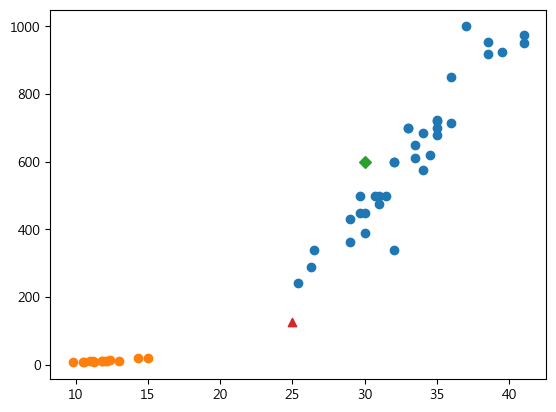

In [40]:
# 25, 125의 고기를 판별하시오
pre = clf.predict([[25,125]])
print("(25,125) 판별 : ",pre)

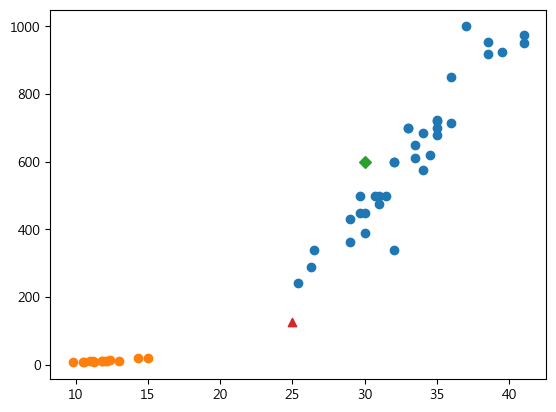

In [41]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(30,600,marker='D')
plt.scatter(25,125,marker='^')

In [43]:
# 25,125의 데이터를 knn판별할 때 사용하는 이웃한 데이터 indexes
distance,indexes = clf.kneighbors([[25,150]])
indexes

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[21,  1,  7, 31, 25]], dtype=int64)

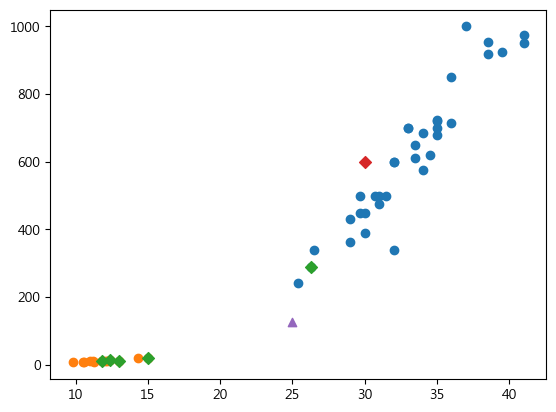

In [49]:
# plt.xlim(0,1000)
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(train_input.iloc[indexes[0],0],train_input.iloc[indexes[0],1],marker='D')
plt.scatter(30,600,marker='D')
plt.scatter(25,125,marker='^')

표준 데이터 구하기

In [53]:
# 표준 점수 :  훈련데이터 - 평균 /  표준편차

# pandas  : 평균, 표준편차
# train_input.mean()
# train_input.std()


# train_scaled

length     27.063889
weight    447.866667
dtype: float64 length      9.948483
weight    314.642028
dtype: float64


In [ ]:
# numpy 
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
# std, mean 확인

In [71]:
train_scaled = (train_input-mean) / std
# test_scaled = (test_input-mean)/std  # train과 test 데이터 개수가 달라서 따로 진행해야함

In [72]:
new = ([25,150]-mean)/std
new

length   -0.207458
weight   -0.946684
dtype: float64

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_24400\4027336304.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(new[0],new[1],marker='^')


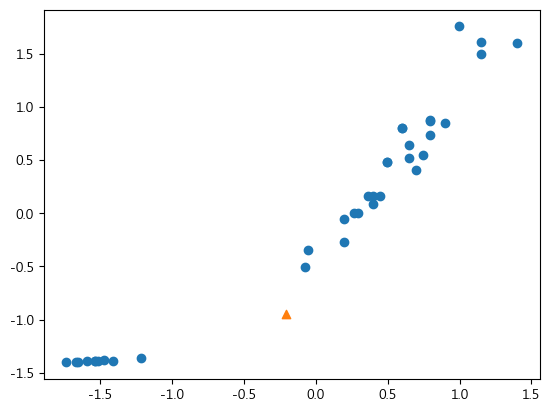

In [73]:
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1])
plt.scatter(new[0],new[1],marker='^')

In [74]:
clf.fit(train_scaled,train_target)

KNeighborsClassifier()

In [75]:
test_scaled = (test_input-mean) / std

In [76]:
score = clf.score(test_scaled, test_target)
print("정답률 : ",score)

정답률 :  1.0


In [77]:
predict = clf.predict([new])
print("예측값 : ",predict)

예측값 :  [1]


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [78]:
# knn 예측에 사용한 데이터
distance, indexes = clf.kneighbors([new])
indexes

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[31, 12,  0, 10,  9]], dtype=int64)

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_24400\3193588016.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(new[0],new[1],marker='^')


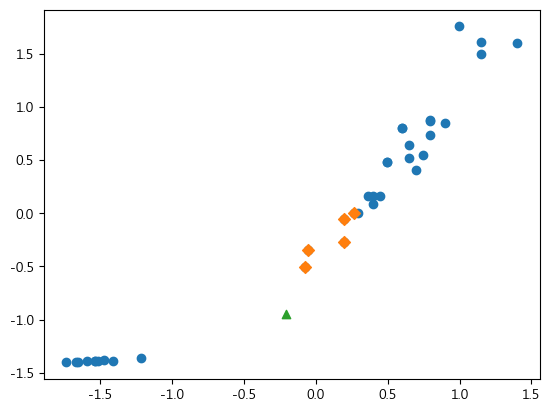

In [80]:
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1])
plt.scatter(train_scaled.iloc[indexes[0],0],train_scaled.iloc[indexes[0],1],marker='D')
plt.scatter(new[0],new[1],marker='^')